In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import mplfinance as mpf
import numpy as np
from scipy.signal import savgol_filter
from statsmodels.nonparametric.kernel_regression import KernelReg

data_10 = pd.read_csv('AAVEUSDT2022-07-10.csv')
data_11 = pd.read_csv('AAVEUSDT2022-07-11.csv')
data_12 = pd.read_csv('AAVEUSDT2022-07-12.csv')
data_x = data_10.append(data_11)
data = data_x.append(data_12)
data = data.drop(['tickDirection', 'trdMatchID'], axis=1)
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')
data.tail()

C:\Users\daria\AppData\Local\Temp\ipykernel_6720\3779555121.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_x = data_10.append(data_11)
C:\Users\daria\AppData\Local\Temp\ipykernel_6720\3779555121.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data_x.append(data_12)


,timestamp,symbol,side,size,price,grossValue,homeNotional,foreignNotional
35505,2022-07-12 23:59:25,AAVEUSDT,Buy,7.00,68.35,4.784500e+10,7.00,478.450
35506,2022-07-12 23:59:28,AAVEUSDT,Buy,1.45,68.40,9.918000e+09,1.45,99.180
35507,2022-07-12 23:59:28,AAVEUSDT,Buy,7.00,68.40,4.788000e+10,7.00,478.800
35508,2022-07-12 23:59:28,AAVEUSDT,Buy,1.50,68.40,1.026000e+10,1.50,102.600
35509,2022-07-12 23:59:33,AAVEUSDT,Sell,0.01,68.40,6.840000e+07,0.01,0.684


In [3]:
def show_filtered_data():
    filter = (data['timestamp'] >= '2022-07-10 00:30:00') & (data['timestamp'] <= '2022-07-10 00:31:00')
    data.loc[filter]

In [4]:
def mpf_plot_create():
    mpf.plot(minutly_price,style='yahoo', type='candle', volume=True)

In [16]:
def show_candlestick_chart(inner_data):
    fig = go.Figure(data=[go.Candlestick(
                x=inner_data.index.to_list(),
                open=inner_data['Open'],
                high=inner_data['High'],
                low=inner_data['Low'],
                close=inner_data['Close'])])

    fig.show()

In [5]:
minutly_price = data.groupby([pd.Grouper(
    key='timestamp', freq='min')]).agg(
        Open = ('price', 'first'),
        High = ('price', 'max'),
        Low = ('price', 'min'),
        Close = ('price', 'last'),
        Volume = ('size', 'sum'), ).round(2)
minutly_price.tail()

,Open,High,Low,Close,Volume
timestamp,,,,,
2022-07-12 23:55:00,68.35,68.35,68.30,68.30,42.38
2022-07-12 23:56:00,68.30,68.50,68.30,68.30,276.29
2022-07-12 23:57:00,68.25,68.30,68.25,68.25,348.39
2022-07-12 23:58:00,68.25,68.30,68.20,68.25,153.49
2022-07-12 23:59:00,68.30,68.40,68.30,68.40,83.51


In [21]:
rolling = minutly_price.rolling(window=100).mean()
rolling.tail()

,Open,High,Low,Close,Volume
timestamp,,,,,
2022-07-12 23:55:00,NaN,NaN,NaN,NaN,161.8313
2022-07-12 23:56:00,NaN,NaN,NaN,NaN,161.5257
2022-07-12 23:57:00,NaN,NaN,NaN,NaN,164.3973
2022-07-12 23:58:00,NaN,NaN,NaN,NaN,163.4514
2022-07-12 23:59:00,NaN,NaN,NaN,NaN,161.5865


In [17]:
show_candlestick_chart(minutly_price)

[78.95, 78.85, 78.65, 78.5, 78.55, 78.3, 78.4, 78.3, 78.8]


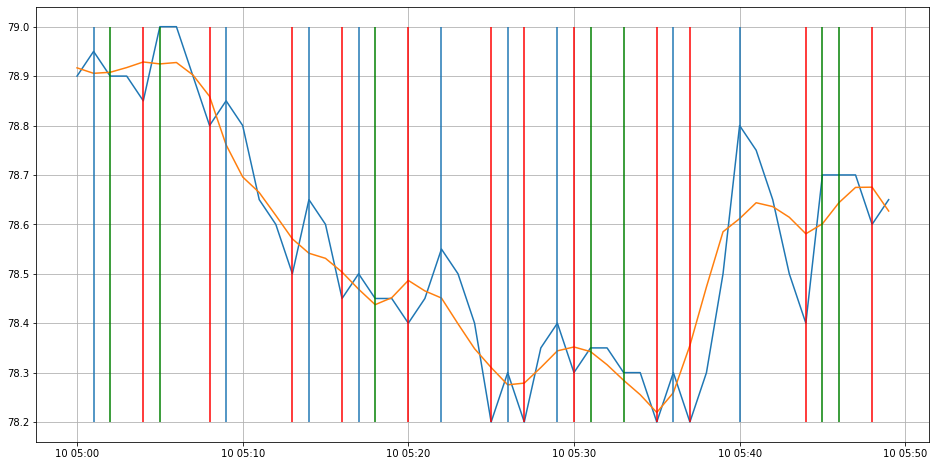

In [127]:
plt.figure(figsize=(16, 8))
plt.grid()

new_prices = minutly_price[300:350]
p = np.array(new_prices['High'])
t = np.array(new_prices.index)
p_smoth = savgol_filter(p, 10, 3)

plt.plot(t, p)
plt.plot(t, p_smoth)

p_rolling = np.array(rolling['High'])
#plt.plot(t, p_rolling)

dpdt = np.diff(p)/1

#plt.plot(t[1:], dpdt+82)

maxi = []
val_max = []
val_min = []
indexes_max = []
indexes_min = []

for i in range(1, len(p)-1):
    if p[i] > p[i-1]:
        if p[i] > p[i+1]:
            val_max.append(p[i])
            indexes_max.append(i)

for i in range(0, len(p)-1):
    if p[i] < p[i-1]:
        if p[i] < p[i+1]:
            val_min.append(p[i])
            indexes_min.append(i)

a = np.where(dpdt == 0)

plt.vlines(t[indexes_max], p.min(), p.max())
plt.vlines(t[indexes_min], p.min(), p.max(), color = 'r')
plt.vlines(t[a[0]], p.min(), p.max(), color = 'g')

print(val_max)

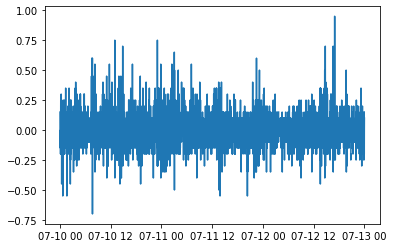

In [35]:
dpdt = np.diff(p)/1

plt.plot(t[1:], dpdt)

In [8]:
hourly_price = data.groupby([pd.Grouper(
    key='timestamp', freq='H')]).agg(
        High = ('price', 'max'),
        Low = ('price', 'min'),
        Open = ('price', 'first'),
        Close = ('price', 'last'),
        Volume = ('size', 'sum'), ).round(2)
hourly_price.head(24)

,High,Low,Open,Close,Volume
timestamp,,,,,
2022-07-10 00:00:00,82.10,79.45,81.80,79.60,43072.77
2022-07-10 01:00:00,80.70,78.55,79.65,78.65,43319.46
2022-07-10 02:00:00,79.45,77.15,78.65,78.85,31518.30
2022-07-10 03:00:00,78.90,77.45,78.80,77.85,23232.52
2022-07-10 04:00:00,79.25,77.35,77.80,78.90,26194.27
2022-07-10 05:00:00,79.00,78.05,78.85,78.70,15846.35
2022-07-10 06:00:00,79.15,78.15,78.70,78.60,10415.79
2022-07-10 07:00:00,81.10,78.40,78.60,80.25,33342.11
2022-07-10 08:00:00,81.55,80.05,80.20,80.50,29152.15


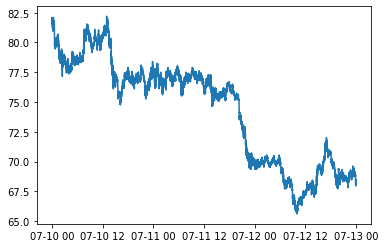

In [9]:
plt.plot(data.timestamp, data.price)